# Lecture 2, A "zero-dimensional" energy balance model of Earth's climate

Thanks a lot to [Henri Drake](https://github.com/hdrake) for providing the lecture.

The original lecture is part of the MIT class [Introduction to Computational Thinking](https://computationalthinking.mit.edu/Fall20/lecture20/).

This class uses the [Julia programming language](http://www.julialang.org/). The orignal code can be found under https://github.com/hdrake/simplEarth/blob/master/1_energy_balance_model.jl

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## 1) Background: climate physics

The simplest climate model can be conceptualized as:

> change in heat content = 

> $+$ absorbed solar radiation (energy from the Sun's rays)

>$-$ outgoing thermal radiation (i.e. blackbody cooling to space)

>$+$ human-caused greenhouse effect (trapped outgoing radiation)


where each of these is interpreted as an average over the entire globe (hence "zero-dimensional").

![](https://raw.githubusercontent.com/hdrake/hdrake.github.io/master/figures/planetary_energy_balance.png)

To make this simple conceptual model quantitative, we need a mathematical formulation for each of these four processes.

### 1.1 Absorbed solar radiation

At Earth's orbital distance from the Sun, the power of the Sun's rays that intercept the Earth is equal to


In [13]:
S = 1368 # solar insolation [W/m^2]  (energy per unit time per unit area)

A small fraction

In [14]:
alpha = 0.3 # albedo, or planetary reflectivity [unitless]

of this incoming solar radiation is reflected back out to space (by reflective surfaces like white clouds, snow, and ice), with the remaining fraction $(1-\alpha)$ being absorbed.
Since the incoming solar rays are all approximately parallel this far from the Sun, the cross-sectional area of the Earth that intercepts them is just a disc of area $\pi R^{2}$. Since all of the other terms we will consider act on the entire surface area $4\pi R^{2}$ of the spherical Earth, the absorbed solar radiation *per unit surface area* (averaged over the entire globe) is reduced by a factor of 4.

![](https://www.open.edu/openlearn/ocw/pluginfile.php/101161/mod_oucontent/oucontent/890/639dcd57/ce3f1c3a/s250_3_002i.jpg)

The absorbed solar radiation per unit area is thus

$\text{absorbed solar radiation} \equiv \frac{S(1-\alpha)}{4}$

In [15]:
def absorbed_solar_radiation(S, alpha):
    return (S*(1-alpha)/4)  # [W/m^2]

### 1.2) Outgoing thermal radiation

The outgoing thermal radiation term  (or "blackbody cooling to space") represents the combined effects of negative feedbacks that dampen warming, such as blackbody radiation, and positive feedbacks that amplify warming, such as the water vapor feedback.

Since these physics are too complicated to deal with here, we linearize the model by considering only the first term of a Taylor Series expansion


$$ G(T) \sim G(T_0) + G^{'}(T_0) (T-T_0) = G^{'}(T_0)T + (G(T_0)-G^{'}(T_0)T_0) $$

around the pre-industrial equilibrium temperature


In [16]:
T0 = 14. # preindustrial temperature [°C]

To simplify the expression, we define:

$ A \equiv G^{'}(T_0)T_0 $

$ B \equiv - G^{'}(T_0) \text{       (the climate feedback parameter),}$

which gives

$$ \text{outgoing thermal radiation} \equiv G(T) \sim A - BT$$

In [17]:
def outgoing_thermal_radiation(T, A, B):
    return A - B*T

The value of the climate feedback parameter used here,

In [18]:
B = -1.3 # climate feedback parameter [W/m^2/°C],

comes from a bottom-up estimate based on the best understanding of the various climate feedbacks (read more [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwikwbfrm9LsAhVjhuAKHQhZCm8QFjAEegQIAhAC&url=https%3A%2F%2Fclimateextremes.org.au%2Fwp-content%2Fuploads%2F2020%2F07%2FWCRP_ECS_Final_manuscript_2019RG000678R_FINAL_200720.pdf&usg=AOvVaw0hWIM3t4kJTovxoeobcRIN)).

Note: Since $B<0$ , this tells us that the overall climate feedback is negative (i.e. stabilizing). Positivefeedbacks cause  to become less negative, reducing the efficiency with which Earth cools itself by radiating thermal energy to space, and thus amplifying warming.

The value $A$ of  is given by the definition of a preindustrial equilibrium, i.e. the fact that before human influence, Earth's energy budget was perfectly balanced:

> absorbed solar radiation = outgoing thermal radiation

or 

> $\frac{S (1-\alpha)}{4} \equiv A - BT_0$

By rearanging this equation, we find that the value of $A$ is given by

In [19]:
A = S*(1. - alpha)/4 + B*T0 # [W/m^2].
A

221.2

### Human-caused greenhouse effect

Empirically, the greenhouse effect is known to be a logarithmic function of gaseous carbon dioxide (CO$_2$) concentrations

$$ \text{Human-caused greenhouse effect} = a * ln  \frac{CO_2}{CO{_2}_{PI}}  $$

where

In [20]:
a = 5 # CO2 forcing coefficient [W/m^2]

In [21]:
CO2_PI = 280 # preindustrial CO2 concentration [parts per million; ppm];

In [22]:
def greenhouse_effect(CO2, a=5, CO2_PI = 280):
    return a*np.log(CO2/CO2_PI)

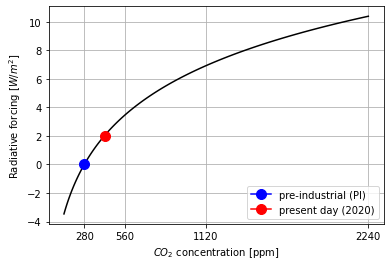

In [23]:
co2_present = 420
co2_range = 280*2**np.linspace(-1,3,100)

plt.plot(co2_range, greenhouse_effect(co2_range), color = "black")
plt.ylabel('Radiative forcing [$W/m^2$]')
plt.xlabel('$CO_2$ concentration [ppm]')
plt.plot(CO2_PI, greenhouse_effect(CO2_PI), marker=".", markersize = 20, label = "pre-industrial (PI)", color = "blue")
plt.plot(co2_present, greenhouse_effect(co2_present), marker=".", markersize = 20, label = "present day (2020)", color = "red")
plt.xticks([280, 280*2, 280*4, 280*8])
plt.legend(loc = 4)
plt.grid()

### 1.4) Change in heat content

The heat content $CT$ is determined by the temperature $T$ (in Kelvin) and the heat capacity of the climate system. While we are interested in the temperature of the atmosphere, which has a very small heat capacity, its heat is closely coupled with that of the upper ocean, which has a much larger heat capacity of

In [24]:
C = 51

The change in heat content over time is thus simply given by $\frac{d(CT)}{dt}$. Since the heat capacity of sea water hardly changes with temperature, we can rewrite this in terms of the change in temperature with time as:

$$\text{change in heat content} = C\frac{dT}{dt} $$

### 1.5) "zero-dimensional" climate model equation

Combining all of these subcomponent models, we write the governing equation of the "zero-dimensional" energy balance climate model as the Ordinary Differential Equation (ODE)

$$ C\frac{dT}{dt} = \frac{S (1-\alpha)}{4} - ( A - BT_0) + a * ln  \frac{CO_2}{CO{_2}_{PI}} $$

which determines the time evolution of Earth's globally-averaged surface temperature.

## 2) Numerical solution method and data structures

### 2.1) Discretization
The energy balance model equation above can be discretized in time as

$$ C\frac{T(t+\Delta t) - T(t)}{\Delta t} = \frac{S (1-\alpha)}{4} - ( A - BT_0) + a * ln  \frac{CO_2}{CO{_2}_{PI}} $$

Our finite difference equation, which results from a first-order truncation of the Taylor series expansion, approximates the exact ordinary differential equation above in the limit that $\Delta t \rightarrow 0$. In practice, we can keep decreasing $\Delta t$ until the solution converges within a tolerable error.

Hereafter, we use the subscript $n$ to denote the $n$-th timestep, where $T_{n+1} \equiv T(t_{n+1})$ denotes the temperature at the next timestep $t_{n+1} = t_n +\Delta t$.

By re-arranging the equation, we can solve for the temperature at the next timestep $n+1$  based on the known temperature at the present timestep $n$:

$$ T_{n+1} = T_n + \frac{\Delta t}{C} \bigg[\frac{S (1-\alpha)}{4} - ( A - BT_n) + a * ln  \frac{CO_2}{CO{_2}_{PI}}\bigg] $$

### 2.2) Timestepping
More generally, we recognize this equation to be of the form:

$$ T_{n+1} = T_n + \Delta t \cdot \text{tendency}(T_n; ...),$$

which we implement below (don't forget to update the time as well, $t_{n+1} = t_n + \Delta t$), which takes in an instance of our anticipated energy balance model EBM type as its only argument.

In [25]:
class ebm():
    """
    Zero order energy balance model
    """

    def __init__(self, T, t, deltat, CO2):
        self.T = np.array(T)
        self.t = t
        
        self.deltat = deltat
        self.C = C
        self.a = a
        self.A = A
        self.B = B
        self.co2_pi = CO2_PI
        self.alpha = alpha
        self.S = S
        self.co2 = CO2
    
    def tendency(self):
        if self.T.size == 1:
             return 1. / self.C * (
            + absorbed_solar_radiation(alpha = self.alpha, S=self.S)
            - outgoing_thermal_radiation(self.T, A = self.A, B=self.B)
            + greenhouse_effect(self.co2(self.t), a = self.a, CO2_PI=self.co2_pi)
            )
        else:
            return 1. / self.C * (
            + absorbed_solar_radiation(alpha = self.alpha, S=self.S)
            - outgoing_thermal_radiation(self.T[-1], A = self.A, B=self.B)
            + greenhouse_effect(self.co2(self.t[-1]), a = self.a, CO2_PI=self.co2_pi)
            )
    @property
    def timestep(self):
        if self.T.size == 1:
            self.T = np.append(self.T, self.T + self.deltat * self.tendency())
            self.t = np.append(self.t, self.t + self.deltat)
        else:
            self.T = np.append(self.T, self.T[-1] + self.deltat * self.tendency())
            self.t = np.append(self.t, self.t[-1] + self.deltat)       

### 2.4) Running simulations of the energy balance model

Let's define a function that runs an EBM simulation by timestepping forward until a given end_year.



In [26]:
def run_ebm(ebm, end_year):
    for year in range(end_year):
        ebm.timestep

For example, let us consider the case where CO₂ emissions increase by 1% year-over-year from the preindustrial value [CO$_2$] = $280.0$ ppm, starting at T=T₀=14°C in year t=0 and with a timestep Δt = 1 year.

In [27]:
def CO2_test(t):
    return CO2_PI ** (1 + 1/100)**t

EBM = ebm(T0, t=0, deltat=1, CO2=CO2_test)

In [28]:
EBM.timestep

In [29]:
EBM.T

array([14., 14.])

## 3) Energy balance model applications
### 3.1) Why was Earth's preindustrial climate so stable?
Let us consider the simple case where CO₂ concentrations remain at their pre-industrial temperatures.

In [30]:
def CO2_test(t):
    return 280

EBM = ebm(T0, 0, 1, CO2_test)

In [31]:
run_ebm(EBM, 200) 

Text(0, 0.5, 'temperature [°C]')

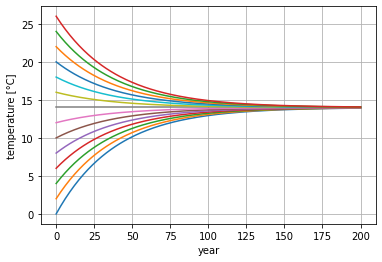

In [32]:
t0s = np.arange(0,28,2)

for i in t0s:
    EBM = ebm(i, 0, 1, CO2_test)
    run_ebm(EBM, 200) 
    plt.plot(EBM.T)

plt.grid()
plt.xlabel("year")
plt.ylabel("temperature [°C]")

This figure shows that, no matter where we start out, the overall negative feedbacks ($B<0$) restore the temperature to the preindustrial equilibrum value of $T_0$ = 14.0 °C, over an exponential timescale of about 100 years.

### 3.2) Historical global warming fueled by greenhouse gas emissions

Human greenhouse gas emissions have fundamentally altered Earth's energy balance, moving us away from the stable preindustrial climate of the past few thousand years.

Since human CO₂ emissions are the main driver of global warming, we expect that if we plug historical CO₂ increases into our model ("forcing" it), we should roughly reproduce the observed historical global warming.

The observed increase of CO2 concentrations can be fairly accurately modelled by the simple cubic formula below.

In [33]:
def co2_hist(t):
    return 280 * (1+ ((t-1850)/220)**3)

In [34]:
EBM = ebm(T0, 1850, 1, co2_hist)

run_ebm(EBM, 170) 

In [35]:
import pandas as pd
url = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
temp = pd.read_csv(url, header = None,
                   skiprows=5, index_col=0,
                   delimiter="     ")
temp = temp + 14.15

CO2_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
co2_data = pd.read_csv(CO2_url, header = 46,skiprows=8, index_col=0) 
co2_data = co2_data.iloc[4:] 
co2_data = pd.to_numeric(co2_data.iloc[:,5]) 
co2_data[co2_data<= 0] = np.nan
co2_data.index = pd.to_datetime(co2_data.index)
co2_data = co2_data.groupby(co2_data.index.year).mean() 

<ipython-input-35-ad0381c77880>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  temp = pd.read_csv(url, header = None,


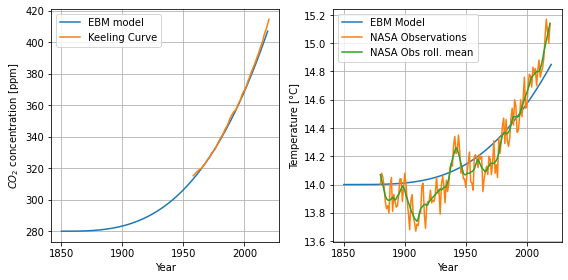

In [36]:
f, (ax, bx) = plt.subplots(1,2, figsize=(8,4))
ax.plot(np.arange(1850, 2020), co2_hist(np.arange(1850, 2020)), label = "EBM model")
ax.plot(co2_data.index, co2_data.values, label="Keeling Curve")
ax.set_ylabel("$CO_2$ concentration [ppm]")
ax.grid()
ax.set_xlabel("Year")
ax.legend()


bx.plot(np.arange(1850, 2021), EBM.T, label="EBM model")
temp.plot(ax = bx)
bx.set_ylabel("Temperature [°C]")
bx.grid()
bx.legend(["EBM Model", "NASA Observations", "NASA Obs roll. mean"])
bx.set_xlabel("Year")

f.tight_layout()

### CO$_2$ emissions predict the trend, but what about the climate noise?

CO$_2$ emissions predict the trend, but what about the climate noise?
Our model does a good job of predicting the long-term trend of increasing temperatures, but what about all of the noise in the observations? These are real signals due to natural variability of the Earth system, not artifacts due to instrumental noise.

This natural noise arises due to the turbulent and chaotic fluid dynamics of the atmosphere and ocean, which we will explore further in Lecture 4 and are illustrated below.

[youtube](https://youtu.be/oRsY_UviBPE)

Now that we've convinced ourselves that the model accurately reproduces historical warming, we can use it to project how much warming we might expect due to future CO₂ emissions.

### 3.3) Best- and worst-case projections of future global warming

Consider two divergent hypothetical futures:

1) a low-emissions world in which emissions decrease such that CO2 concentrations stay below 500 ppm by 2100 (known in climate circles as "RCP2.6") and

2) a high-emissions world in which emissions continue increasing and CO2 concentrations soar upwards of 1200 ppm ("RCP8.5").

In [37]:
def CO2_RCP26(t):
    return 280 * (1+ ((t-1850)/220)**3 * np.minimum(1., np.exp(-((t-1850)-170)/100)))
def CO2_RCP85(t):
    return 280 * (1+ ((t-1850)/220)**3 * np.maximum(1., np.exp(((t-1850)-170)/100)))

In the low-emissions scenario, the temperature increase stays below $\Delta T$ = 2 °C by 2100, while in the high-emissions scenario temperatures soar upwards of 3.5ºC above pre-industrial levels.

In [38]:
EBM1 = ebm(T0, 1850, 1, CO2_RCP26)
EBM2 = ebm(T0, 1850, 1, CO2_RCP85)

run_ebm(EBM1, 249) 
run_ebm(EBM2, 249) 

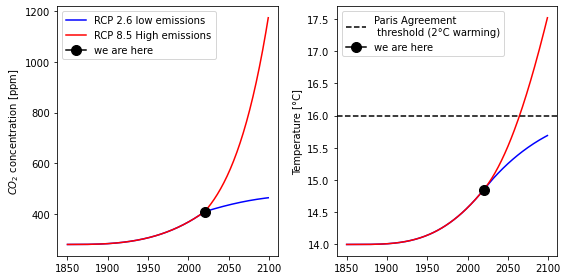

In [39]:
f, (ax, bx) = plt.subplots(1,2, figsize = (8,4))

ax.plot(np.arange(1850, 2100), CO2_RCP26(np.arange(1850,2100)), 
        color = "Blue", label = "RCP 2.6 low emissions")
ax.plot(np.arange(1850, 2100), CO2_RCP85(np.arange(1850,2100)),
        color = "Red", label = "RCP 8.5 High emissions")
ax.plot(2020, CO2_RCP26(2020), marker=".",
        markersize = 20, label = "we are here", color = "black")
ax.set_ylabel("$CO_2$ concentration [ppm]")
ax.legend()

bx.plot(np.arange(1850, 2100), EBM1.T, color = "Blue")
bx.plot(np.arange(1850, 2100), EBM2.T,  color = "Red")
bx.axhline(y = 16, label = "Paris Agreement\n threshold (2°C warming)",
           ls="--", color = "black")
bx.set_ylabel("Temperature [°C]")
bx.plot(2020, EBM1.T[170], marker=".", 
         markersize = 20, label = "we are here", color = "black")
bx.legend()

f.tight_layout()